In [1]:
# Part 1: alpha beta concordance across methods
# Part 2: tech generates similar results: alpha and beta
# Part 3: focus on PB and linear growth and other associations
# Part 4: expanded dataset and ML linear growth

In [3]:
# Part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [ ]:
#dataframe contains all of the multivariate statistics from the analyses where 3 samples where dropped n=44 (3 samples did not have enough data: 2 from PB and 1 for ONT thus were dropped to reduce bias) along with the pairwise analyses for the hybrid full analysis n=47
concord=pd.read_csv('../Table_S17_multivar_stats_c986.csv')


In [24]:
#creates dataframe which only retains samples which were significant AND samples for the technology comparison where 44 samples were compared
concord_sig=concord.loc[(concord['P_sig']=='yes') & (concord['n']==42)]
concord_sig.shape

(53, 24)

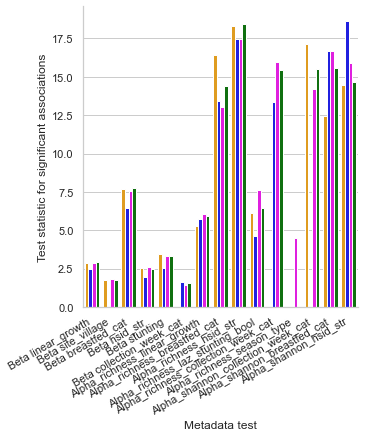

In [ ]:
#Plot showing the F-stat across sequencing methods only for tests which were significant

plt.figsize=(4,4)
abconcord=sns.catplot(data=concord_sig, kind="bar", x="summary", y="test_statistic", hue="sequencing", palette=['orange','blue', 'magenta', 'green'])
abconcord.set_axis_labels("Metadata test", "Test statistic for significant associations")
plt.xticks(rotation=30, horizontalalignment='right')
abconcord._legend.remove()
plt.savefig("../Figures/Fig3F_concord.png", dpi=600, bbox_inches="tight")

In [ ]:
# import the alpha diversity data from the technology comparison (42 samples across ILMN, ONT, PB, hybrid)
alpha=pd.read_csv('../Table_S16_alpha_results.csv')
alpha.head()


,id,sequencing_meth,observed_features,observed_features_pb,shannon_entropy,shannon_entropy_pb,anonymized_name,host_subject_id,collection_week_cat,eed_severe,...,incl_libprep,l_percent,breastfed,plate_col,whz,muac_cm,hsid,weight_kg,incl_sizesel,season_type
0,216931.15947.HYBRID.A1,hybrid,176,117,2.1754,2.0685,a1,526.0,T0,0,...,0,0.43,1,1,0.26,15.6,526,11.07,0,dry
1,216931.15947.HYBRID.A2,hybrid,176,107,3.1598,3.1412,a2,526.0,T2,not measured,...,0,not measured,1,2,0.53,15.6,526,11.36,0,dry
2,216931.15947.HYBRID.A3,hybrid,330,319,3.3978,3.3637,a3,526.0,T12,0,...,0,0.28,0,3,0.55,15.4,526,11.94,0,dry
3,216931.15947.HYBRID.A4,hybrid,494,462,4.5837,4.5656,a4,526.0,T24,0,...,0,0.24,0,4,0.71,16.0,526,12.81,0,rain
4,216931.15947.HYBRID.A5,hybrid,455,399,4.7876,4.6953,a5,526.0,T36,0,...,0,0.43,0,5,1.06,17.0,526,13.69,0,rain


In [27]:
#groupby combines differencet columns .observed_features. <indicates what column you go for> .first().   .unstack() <returns a df>
richness= alpha.groupby(["sequencing_meth", "anonymized_name"]).observed_features.first().unstack()

In [28]:
#groupby combines differencet columns .observed_features. <indicates what column you go for> .first().   .unstack() <returns a df>
shannon= alpha.groupby(["sequencing_meth", "anonymized_name"]).shannon_entropy.first().unstack()

In [29]:
#create 3 df for each sequencing technology to enable graphing 

alpha_ILMN=alpha.loc[alpha['sequencing_meth']=='ILMN']
alpha_ONT=alpha.loc[alpha['sequencing_meth']=='ONT']
alpha_hyb=alpha.loc[alpha['sequencing_meth']=='hybrid']

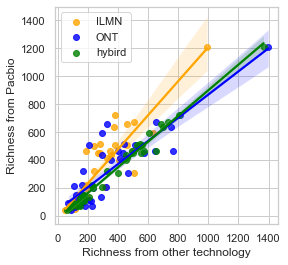

In [ ]:
# Create alpha diversity (richness) comparison plot ONT vs PB include transpose
fig, ax=plt.subplots(figsize=(4,4))
sns.regplot(data=alpha_ILMN, x='observed_features', y='observed_features_pb', fit_reg=True, ci=95, ax=ax, label='ILMN', color='orange')
sns.regplot(data=alpha_ONT, x='observed_features', y='observed_features_pb', fit_reg=True, ci=95, ax=ax, label='ONT', color='blue') 
sns.regplot(data=alpha_hyb, x='observed_features', y='observed_features_pb', fit_reg=True, ci=95, ax=ax, label='hybird', color='green') 
           
ax.set(xlabel='Richness from other technology', ylabel='Richness from Pacbio')
plt.xticks(np.arange(0, 1500, step=200))
plt.yticks(np.arange(0, 1500, step=200))
ax.legend()

plt.savefig("../Figures/Fig3B_ONT.PB.ILMN_richness.png", dpi=600, bbox_inches="tight")

In [31]:
###linear regression ILMN vs PB
stats.linregress(alpha_ILMN['observed_features'], alpha_ILMN['observed_features_pb'])

# New value
#LinregressResult(slope=1.2182487083916507, intercept=-10.496232183244729, rvalue=0.8923824865571105, pvalue=2.1031735557246484e-15, stderr=0.09740939862792346)


LinregressResult(slope=1.2182487083916507, intercept=-10.496232183244729, rvalue=0.8923824865571105, pvalue=2.1031735557246484e-15, stderr=0.09740939862792346)

In [32]:
###linear regression ONT vs PB
stats.linregress(alpha_ONT['observed_features'], alpha_ONT['observed_features_pb'])
#NewValue
#LinregressResult(slope=0.828394460172525, intercept=39.91048789697453, rvalue=0.8765805149534459, pvalue=2.801285309680328e-14, stderr=0.07191025749324871)


LinregressResult(slope=0.828394460172525, intercept=39.91048789697453, rvalue=0.8765805149534459, pvalue=2.801285309680328e-14, stderr=0.07191025749324871)

In [33]:
###linear regression HYBRID vs PB
stats.linregress(alpha_hyb['observed_features'], alpha_hyb['observed_features_pb'])
# new value
#LinregressResult(slope=0.9174288286358414, intercept=-18.7396378105135, rvalue=0.991363477750638, pvalue=6.4799402212769005e-37, stderr=0.019189081571419467)


LinregressResult(slope=0.9174288286358414, intercept=-18.7396378105135, rvalue=0.991363477750638, pvalue=6.4799402212769005e-37, stderr=0.019189081571419467)

In [34]:
## Shannon Diversity


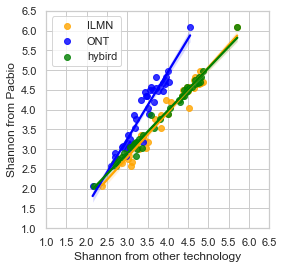

In [ ]:
# Create alpha diversity (richness) comparison plot ONT vs PB include transpose
fig, ax=plt.subplots(figsize=(4,4))
sns.regplot(data=alpha_ILMN, x='shannon_entropy', y='shannon_entropy_pb', fit_reg=True, ci=95, ax=ax, label='ILMN', color='orange')
sns.regplot(data=alpha_ONT, x='shannon_entropy', y='shannon_entropy_pb', fit_reg=True, ci=95, ax=ax, label='ONT', color='blue') 
sns.regplot(data=alpha_hyb, x='shannon_entropy', y='shannon_entropy_pb', fit_reg=True, ci=95, ax=ax, label='hybird', color='green') 
           
ax.set(xlabel='Shannon from other technology', ylabel='Shannon from Pacbio')
plt.xticks(np.arange(1, 7, step=0.5))
plt.yticks(np.arange(1, 7, step=0.5))
ax.legend()


plt.savefig("../Figures/Fig3C_ONT.PB.ILMN_shannon.png", dpi=600, bbox_inches="tight")


In [37]:
###linear regression ILMN vs PB
stats.linregress(alpha_ILMN['shannon_entropy'], alpha_ILMN['shannon_entropy_pb'])
#New
#LinregressResult(slope=1.1371660410562632, intercept=-0.617554178367727, rvalue=0.9804546508322636, pvalue=7.286513403133563e-30, stderr=0.03608033349307462)


LinregressResult(slope=1.1371660410562632, intercept=-0.617554178367727, rvalue=0.9804546508322636, pvalue=7.286513403133563e-30, stderr=0.03608033349307462)

In [38]:
###linear regression ONT vs PB
stats.linregress(alpha_ONT['shannon_entropy'], alpha_ONT['shannon_entropy_pb'])
#New
# LinregressResult(slope=1.691833619855223, intercept=-1.8178888512883429, rvalue=0.9613261215561191, pvalue=5.1740574155971074e-24, stderr=0.07663738582590429)


LinregressResult(slope=1.691833619855223, intercept=-1.8178888512883429, rvalue=0.9613261215561191, pvalue=5.1740574155971074e-24, stderr=0.07663738582590429)

In [39]:
###linear regression HYBRID vs PB
stats.linregress(alpha_hyb['shannon_entropy'], alpha_hyb['shannon_entropy_pb'])
#New
#LinregressResult(slope=1.0748366900364048, intercept=-0.3201144890023002, rvalue=0.9920452491759794, pvalue=1.2589653347757495e-37, stderr=0.021564723560223202)


LinregressResult(slope=1.0748366900364048, intercept=-0.3201144890023002, rvalue=0.9920452491759794, pvalue=1.2589653347757495e-37, stderr=0.021564723560223202)

In [ ]:
## PB, linear growth and other associations

In [ ]:
# Dataset originates from Qiita study ID:15947   (Analysis ID: 69952) (artifact: ID: 217296)
# This is the pacbio only dataset 45 samples, rarified to 500,000,000
# 



In [2]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/LR-MG_Data/Notebooks-analysis'

In [ ]:
PB_45 = pd.read_csv('../Table_S18_pacbio_45_featuretable.csv')


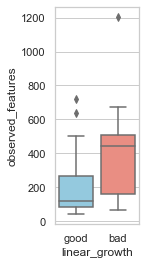

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
colors=["skyblue", "salmon"]
richness=sns.boxplot(data=PB_45, x="linear_growth", y="observed_features",palette=colors)
plt.savefig("../Figures/Fig3G_richness-lg.png", dpi=600, bbox_inches="tight")

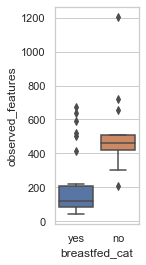

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
richness=sns.boxplot(data=PB_45, x="breastfed_cat", y="observed_features")
plt.savefig("../Figures/Fig3H_richness-breastfed.png", dpi=600, bbox_inches="tight")

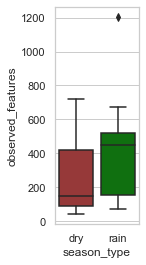

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
colors=["brown", "green"]
richness=sns.boxplot(data=PB_45, x="season_type", y="observed_features",palette=colors)
plt.savefig("../Figures/Fig3I_richness-season.png", dpi=600, bbox_inches="tight")

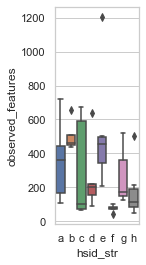

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
richness=sns.boxplot(data=PB_45, x="hsid_str", y="observed_features")
plt.savefig("../Figures/Fig3J_richness-hsid.png", dpi=600, bbox_inches="tight")

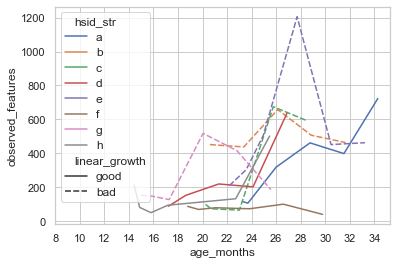

In [ ]:
fig, ax=plt.subplots(figsize=(6,4))
age_biomass=sns.lineplot(data=PB_45, x="age_months", y="observed_features", hue="hsid_str", style="linear_growth")
plt.xticks(range(8, 36, 2))
plt.savefig("../Figures/Fig3K_richness-months.png", dpi=600, bbox_inches="tight")

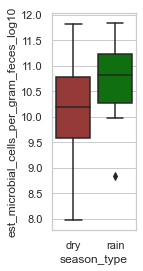

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
colors=["brown", "green"]
biomass=sns.boxplot(data=PB_45, x="season_type", y="est_microbial_cells_per_gram_feces_log10",palette=colors)
plt.savefig("../Figures/Fig3L_biomass-season.png", dpi=600, bbox_inches="tight")

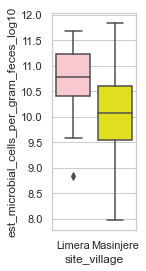

In [ ]:
fig, ax=plt.subplots(figsize=(1.5,4))
colors=["pink", "yellow"]
biomass=sns.boxplot(data=PB_45, x="site_village", y="est_microbial_cells_per_gram_feces_log10",palette=colors)
plt.savefig("../Figures/Fig3M_biomass-village.png", dpi=600, bbox_inches="tight")

In [ ]:
#Distribution is mean and default CI of 95
fig, ax=plt.subplots(figsize=(4,4))
alpha_gamma=sns.barplot(data=PB_45, x="hsid_str", y="total_alpha_percent")
plt.savefig("SuppFig5M_alpha_gamma.png", dpi=600, bbox_inches="tight")


In [ ]:
## Stats for everything
#Mannwhitney test
#kruskall wallis test
observed_features
est_microbial_cells_per_gram_feces_log10

linear_growth
breastfed_cat
season_type
site_village

hsid_str

In [87]:
## linear growth

lg_good=PB_45.loc[PB_45['linear_growth']=='good']
lg_bad=PB_45.loc[PB_45['linear_growth']=='bad']

lg_good_rich=lg_good['observed_features']
lg_bad_rich=lg_bad['observed_features']

lg_good_biomass=lg_good['est_microbial_cells_per_gram_feces_log10']
lg_bad_biomass=lg_bad['est_microbial_cells_per_gram_feces_log10']

In [88]:
#lg richness
stats.mannwhitneyu(lg_good_rich, lg_bad_rich, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=139.5, pvalue=0.010292694842655627)

MannwhitneyuResult(statistic=139.5, pvalue=0.01029018713740989)

In [89]:
#lg biomass
stats.mannwhitneyu(lg_good_biomass, lg_bad_biomass, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=226.0, pvalue=0.5472793263757082)

MannwhitneyuResult(statistic=226.0, pvalue=0.5473717181492526)

In [90]:
## breastfed_cat
bf_yes=PB_45.loc[PB_45['breastfed_cat']=='yes']
bf_no=PB_45.loc[PB_45['breastfed_cat']=='no']

bf_yes_rich=bf_yes['observed_features']
bf_no_rich=bf_no['observed_features']

bf_yes_biomass=bf_yes['est_microbial_cells_per_gram_feces_log10']
bf_no_biomass=bf_no['est_microbial_cells_per_gram_feces_log10']

In [91]:
#breastfed richness
stats.mannwhitneyu(bf_yes_rich, bf_no_rich, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=65.0, pvalue=0.00012275310232328116)

MannwhitneyuResult(statistic=65.0, pvalue=0.00012275310232328116)

In [92]:
#breastfed biomass
stats.mannwhitneyu(bf_yes_biomass, bf_no_biomass, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=179.0, pvalue=0.27329271387367615)

MannwhitneyuResult(statistic=179.0, pvalue=0.27329271387367615)

In [93]:
## season
dry=PB_45.loc[PB_45['season_type']=='dry']
rain=PB_45.loc[PB_45['season_type']=='rain']

dry_rich=dry['observed_features']
rain_rich=rain['observed_features']

dry_biomass=dry['est_microbial_cells_per_gram_feces_log10']
rain_biomass=rain['est_microbial_cells_per_gram_feces_log10']

In [94]:
#season richness
stats.mannwhitneyu(dry_rich, rain_rich, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=147.0, pvalue=0.03410924657249979)

MannwhitneyuResult(statistic=147.0, pvalue=0.03410924657249979)

In [95]:
#season biomass
stats.mannwhitneyu(dry_biomass, rain_biomass, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=143.0, pvalue=0.026947343066154632)

MannwhitneyuResult(statistic=143.0, pvalue=0.026947343066154632)

In [98]:
## village
Lim=PB_45.loc[PB_45['site_village']=='Limera']
Mas=PB_45.loc[PB_45['site_village']=='Masinjere']

lim_rich=Lim['observed_features']
mas_rich=Mas['observed_features']

lim_biomass=Lim['est_microbial_cells_per_gram_feces_log10']
mas_biomass=Mas['est_microbial_cells_per_gram_feces_log10']

In [100]:
#village richness
stats.mannwhitneyu(lim_rich, mas_rich, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=327.0, pvalue=0.09006681723466047)

MannwhitneyuResult(statistic=327.0, pvalue=0.09006681723466047)

In [101]:
#village biomass
stats.mannwhitneyu(lim_biomass, mas_biomass, use_continuity=True, alternative='two-sided')
# MannwhitneyuResult(statistic=364.0, pvalue=0.011189870068465644)

MannwhitneyuResult(statistic=364.0, pvalue=0.011189870068465644)

In [102]:
## hsid
a=PB_45.loc[PB_45['hsid_str']=='a']
b=PB_45.loc[PB_45['hsid_str']=='b']
c=PB_45.loc[PB_45['hsid_str']=='c']
d=PB_45.loc[PB_45['hsid_str']=='d']
e=PB_45.loc[PB_45['hsid_str']=='e']
f=PB_45.loc[PB_45['hsid_str']=='f']
g=PB_45.loc[PB_45['hsid_str']=='g']
h=PB_45.loc[PB_45['hsid_str']=='h']

a_rich=a['observed_features']
b_rich=b['observed_features']
c_rich=c['observed_features']
d_rich=d['observed_features']
e_rich=e['observed_features']
f_rich=f['observed_features']
g_rich=g['observed_features']
h_rich=h['observed_features']

a_bio=a['est_microbial_cells_per_gram_feces_log10']
b_bio=b['est_microbial_cells_per_gram_feces_log10']
c_bio=c['est_microbial_cells_per_gram_feces_log10']
d_bio=d['est_microbial_cells_per_gram_feces_log10']
e_bio=e['est_microbial_cells_per_gram_feces_log10']
f_bio=f['est_microbial_cells_per_gram_feces_log10']
g_bio=g['est_microbial_cells_per_gram_feces_log10']
h_bio=h['est_microbial_cells_per_gram_feces_log10']



In [103]:
stats.kruskal(a_rich, b_rich,c_rich,d_rich,e_rich,f_rich,g_rich,h_rich)
# KruskalResult(statistic=19.30756797118637, pvalue=0.007276532585049867)

KruskalResult(statistic=19.30756797118637, pvalue=0.007276532585049867)

In [104]:
stats.kruskal(a_bio, b_bio,c_bio,d_bio,e_bio,f_bio,g_bio,h_bio)
# KruskalResult(statistic=9.270917874396133, pvalue=0.23378608872570286)

KruskalResult(statistic=9.270917874396133, pvalue=0.23378608872570286)

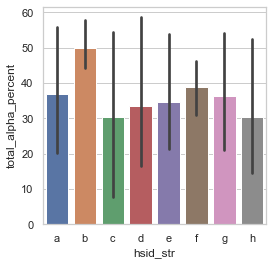

In [ ]:
#Distribution is mean and default CI of 95
fig, ax=plt.subplots(figsize=(4,4))
alpha_gamma=sns.barplot(data=PB_45, x="hsid_str", y="total_alpha_percent")
plt.savefig("../Figures/Fig3N_alpha_gamma.png", dpi=600, bbox_inches="tight")


In [8]:
PB_45['total_alpha_percent'].mean()

36.281333333333336

In [10]:
PB_45['total_alpha_percent'].std()

22.11705158715987